# Hw1_成都市租房价格分析

## 1 爬取数据

- 爬虫代码见 lianjia_crawler.py

In [204]:
import matplotlib.font_manager as fm
import numpy as np

# 打印所有可用字体
# SimHei不可用
for font in fm.findSystemFonts(fontpaths=None, fontext='ttf'):
    print(font)

import sys
print(sys.executable)
# Pycharm 重启解决 python解释器 问题

/System/Library/Fonts/Supplemental/NotoSansSylotiNagri-Regular.ttf
/System/Library/Fonts/Supplemental/Trebuchet MS.ttf
/System/Library/AssetsV2/com_apple_MobileAsset_Font7/aa99d0b2bad7f797f38b49d46cde28fd4b58876e.asset/AssetData/Xingkai.ttc
/System/Library/Fonts/Supplemental/Telugu MN.ttc
/System/Library/Fonts/Supplemental/NotoSansCuneiform-Regular.ttf
/System/Library/AssetsV2/com_apple_MobileAsset_Font7/70816a43827731d40efe234b94feba96db91024f.asset/AssetData/NanumMyeongjo.ttc
/System/Library/Fonts/Supplemental/Rockwell.ttc
/System/Library/AssetsV2/com_apple_MobileAsset_Font7/0818d874bf1d0e24a1fe62e79f407717792c5ee1.asset/AssetData/OsakaMono.ttf
/System/Library/Fonts/ヒラギノ角ゴシック W1.ttc
/System/Library/Fonts/Optima.ttc
/System/Library/AssetsV2/com_apple_MobileAsset_Font7/9fdda46cbe802833590494a09b2787378340c597.asset/AssetData/Hanzipen.ttc
/System/Library/Fonts/Supplemental/NotoSansSiddham-Regular.otf
/System/Library/AssetsV2/com_apple_MobileAsset_Font7/42062e40d643fdb5bb3fba917212352f

## 2 读取数据

In [205]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用系统中可用的中文字体
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [206]:
file_data=pd.read_csv('./chengdu_rent_1.csv')
file_data.head()

,Title,Price,Area,Region,Link
0,整租·悦彩广场 1室1厅 东,1700 元/月,36.81㎡,温江-温江大学城-悦彩广场,https://cd.lianjia.com/zufang/CD19559224339154...
1,整租·天府半岛七期 3室2厅 西南,1900 元/月,91.28㎡,天府新区-锦江生态带-天府半岛七期,https://cd.lianjia.com/zufang/CD19554644353634...
2,整租·翡翠城四期 3室1厅 东南,3300 元/月,87.99㎡,锦江-东湖-翡翠城四期,https://cd.lianjia.com/zufang/CD16993487308864...
3,独栋·龙湖冠寓 成都滨江天街店 【国庆钜惠】东郊记忆3一个月起租可月付短租 0中介今日可看房 开间,1891-2180 元/月,35.00㎡,仅剩2间,https://cd.lianjia.com/apartment/49105.html
4,整租·蓝光T-max 3室2厅 南/西南,3200 元/月,132.52㎡,双流-航空港-蓝光T-max,https://cd.lianjia.com/zufang/CD19558896193125...


In [207]:
file_data.tail()

,Title,Price,Area,Region,Link
94,整租·万科天荟 1室0厅 东南/南/西南,1900 元/月,37.14㎡,成华-东郊记忆-万科天荟,https://cd.lianjia.com/zufang/CD19537506949513...
95,合租·蓝光COCO蜜城 3居室 南卧,930 元/月,7.30㎡,青羊-贝森-蓝光COCO蜜城,https://cd.lianjia.com/zufang/CD18426456669463...
96,整租·天紫界 1室0厅 东南,2050 元/月,32.00㎡,锦江-九眼桥-天紫界,https://cd.lianjia.com/zufang/CD19520613655437...
97,独栋·龙湖冠寓 成都天府四街店 限时特惠！整租一个月起无中介阳光朝南loft 近字节抖音 1室1厅,1988-2088 元/月,40.00㎡,仅剩2间,https://cd.lianjia.com/apartment/51694.html
98,整租·融侨悦蓉城 1室1厅 东南,1450 元/月,30.51㎡,新都-大丰-融侨悦蓉城,https://cd.lianjia.com/zufang/CD19523136262284...


In [208]:
file_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   99 non-null     object
 1   Price   99 non-null     object
 2   Area    99 non-null     object
 3   Region  99 non-null     object
 4   Link    99 non-null     object
dtypes: object(5)
memory usage: 4.0+ KB


In [209]:
file_data.columns

Index(['Title', 'Price', 'Area', 'Region', 'Link'], dtype='object')

## 3 数据预处理

### 3.1 重复值和空值处理

In [210]:
print("重复数据数量:", file_data.duplicated().sum())
file_data = file_data.drop_duplicates()
print("缺失值统计:\n", file_data.isnull().sum())
file_data = file_data.dropna()

重复数据数量: 11
缺失值统计:
 Title     0
Price     0
Area      0
Region    0
Link      0
dtype: int64


## 4 图标分析

### 4.1 房源数量、位置分布分析

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

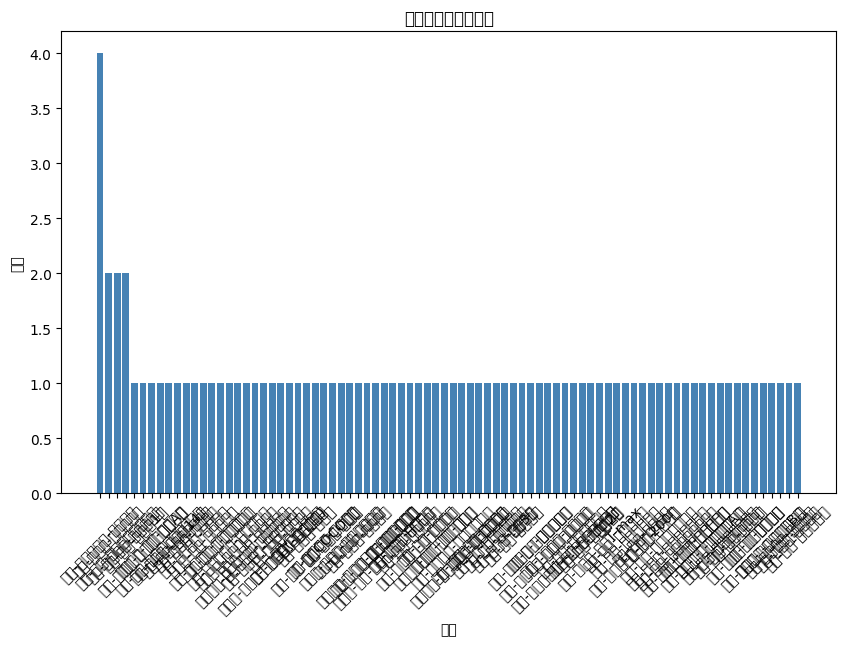

In [211]:
# 创建一个DataFrame对象，该对象只有两列数据：区域和数量
new_df = pd.DataFrame({'Region': file_data['Region'].unique(), '数量': [0] * len(file_data['Region'].unique())})

# 按“Region”列将file_data进行分组，并统计每个分组的数量
groupy_region = file_data.groupby(by='Region').count()
new_df['数量'] = groupy_region['Title'].values

# 按“数量”一列从大到小排列
new_df.sort_values(by=['数量'], ascending=False, inplace=True)

# 绘制条形图
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(new_df['Region'], new_df['数量'], color='steelblue')
plt.xlabel('区域')
plt.ylabel('数量')
plt.title('成都各区域房源数量')
plt.xticks(rotation=45)
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

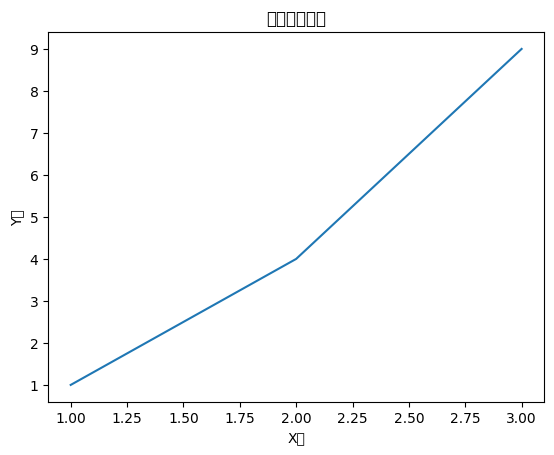

In [212]:
import matplotlib.pyplot as plt

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 尝试使用 SimHei
plt.rcParams['axes.unicode_minus'] = False

# 测试绘图
plt.figure()
plt.title("测试中文字体")
plt.plot([1, 2, 3], [1, 4, 9])
plt.xlabel("X轴")
plt.ylabel("Y轴")
plt.show()
